In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Spherical Transformations using SVD

## 1. Transforming a Sphere to an Ellipsoid

In [9]:
def make_sphere(points=20, radius=1, center=(0, 0, 0)):
    sphere = []
    for i in range(points):
        theta = 2 * np.pi * i / points
        for j in range(points):
            phi = np.pi * j / points
            x = radius * np.sin(phi) * np.cos(theta) + center[0]
            y = radius * np.sin(phi) * np.sin(theta) + center[1]
            z = radius * np.cos(phi) + center[2]
            sphere.append([x, y, z])
    return np.array(sphere)

In [10]:
def plot_3d(matrix, fig=None, color='b'):
    if fig is None:
        fig = plt.axes(projection='3d')
    fig.scatter(matrix[0], matrix[1], matrix[2], c=color, marker='.')
    return fig

In [11]:
def random_matrix(low=0, high=1):
    return np.random.uniform(low=low, high=high, size=(3, 3))

In [12]:
def main1():
    sphere = make_sphere()
    canvas = plot_3d(np.transpose(sphere))
    for color in ['r', 'g', 'y']:
        matrix = random_matrix()
        elipse = np.matmul(sphere, matrix)
        canvas = plot_3d(np.transpose(elipse), fig=canvas, color=color)
        
        u, s, vh = np.linalg.svd(matrix)
        axes_lengths = np.sqrt(s)

        for i in range(3):
            axis = vh[i] * axes_lengths[i]
            canvas.plot([0, axis[0]], [0, axis[1]], [0, axis[2]], color=color)
    plt.show()

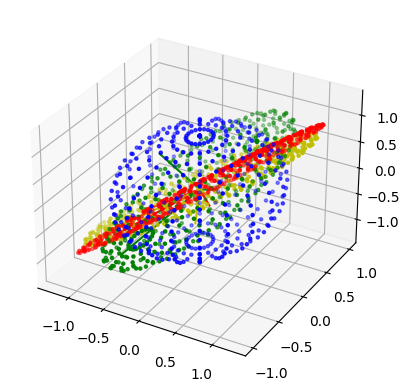

In [13]:
main1()

## 2. Transform using wrong conditioned matrix

In [14]:
def main2(): # stosunek jej największej i najmniejszej wartości osobliwej był większy od 100
    # Losowa macierz ortogonalna
    Q, _ = np.linalg.qr(np.random.randn(3, 3))

    # Stosunek wartości osobliwych
    ratio = 100  # Wybierz stosunek większy niż 100

    # Macierz diagonalna wartości osobliwych
    sigma_max = 1.0
    sigma_min = sigma_max / ratio
    Sigma = np.diag([sigma_max, sigma_min, sigma_min])

    # Macierz Ai
    Ai = np.dot(Q, Sigma)

    # Rysowanie elipsy
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Elipsoida
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Transformacja elipsoidy przez macierz Ai
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i, j], y[i, j], z[i, j]] = np.dot(Ai, [x[i, j], y[i, j], z[i, j]])

    # Rysowanie
    ax.plot_surface(x, y, z, color='b', alpha=0.5)
    plt.show()

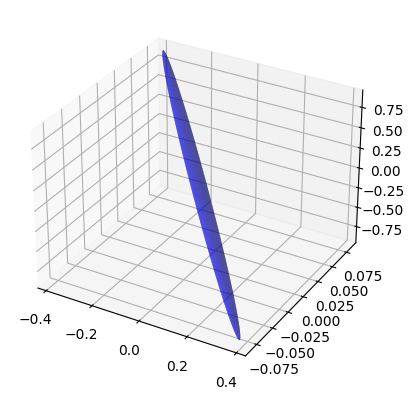

In [15]:
main2()

## 3. Present each step of the transformation (rotation, scaling, rotation)

In [22]:
def main3(): # porównanie
    Ai = random_matrix()

    # Obliczenie SVD
    Ui, Si, ViT = np.linalg.svd(Ai)

    # Generowanie sfer
    num_points = 30
    S = make_sphere(num_points)

    # Wizualizacja SVT
    SVT = np.dot(S, ViT[:3].T)

    # Wizualizacja SVΣT
    SVSigmaVT = np.dot(SVT, np.diag(Si[:3]))

    # Wizualizacja SUVΣT
    SUVSigmaVT = np.dot(SVSigmaVT, Ui.T)

    # Wizualizacja
    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(141, projection='3d')
    ax1.scatter(S[:, 0], S[:, 1], S[:, 2], color='blue', alpha=0.5)
    ax1.set_title('S')

    ax2 = fig.add_subplot(142, projection='3d')
    ax2.scatter(SVT[:, 0], SVT[:, 1], SVT[:, 2], color='red', alpha=0.5)
    ax2.set_title('SV$^T$')

    ax4 = fig.add_subplot(143, projection='3d')
    ax4.scatter(SVSigmaVT[:, 0], SUVSigmaVT[:, 1], SUVSigmaVT[:, 2], color='orange', alpha=0.5)
    ax4.set_title('S$\\Sigma$VT')

    ax3 = fig.add_subplot(144, projection='3d')
    ax3.scatter(SUVSigmaVT[:, 0], SUVSigmaVT[:, 1], SUVSigmaVT[:, 2], color='green', alpha=0.5)
    ax3.set_title('SUV$\\Sigma$V$^T$')

    plt.tight_layout()
    plt.show()

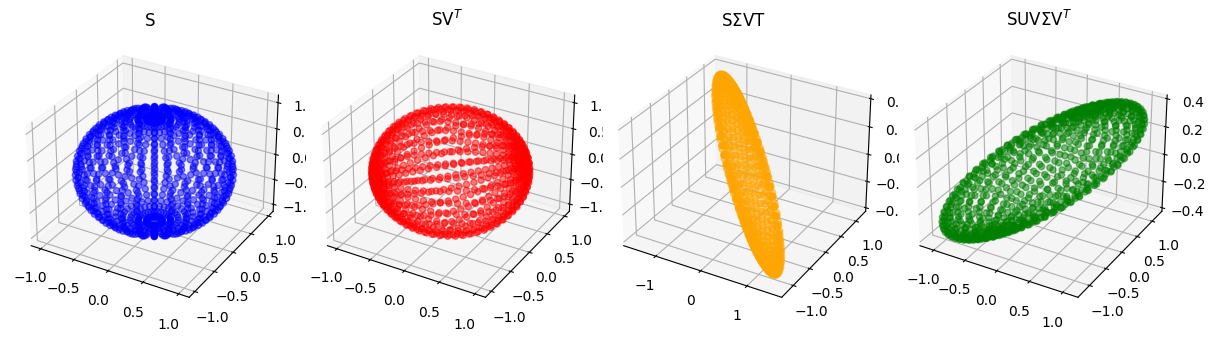

In [23]:
main3()